In [1]:
from google.colab import files
uploaded = files.upload()

Saving WineQT.csv to WineQT.csv


In [2]:
import pandas as pd
df = pd.read_csv("WineQT.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
# Check the shape of the dataset (rows, columns)
print("Shape of dataset:", df.shape)

# Get column names
print("\nColumn names:")
print(df.columns)

# Get basic info about data types and nulls
print("\nInfo:")
print(df.info())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Describe the dataset
print("\nSummary Statistics:")
print(df.describe())

Shape of dataset: (1143, 13)

Column names:
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float6

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# For better chart visuals
sns.set(style="whitegrid")

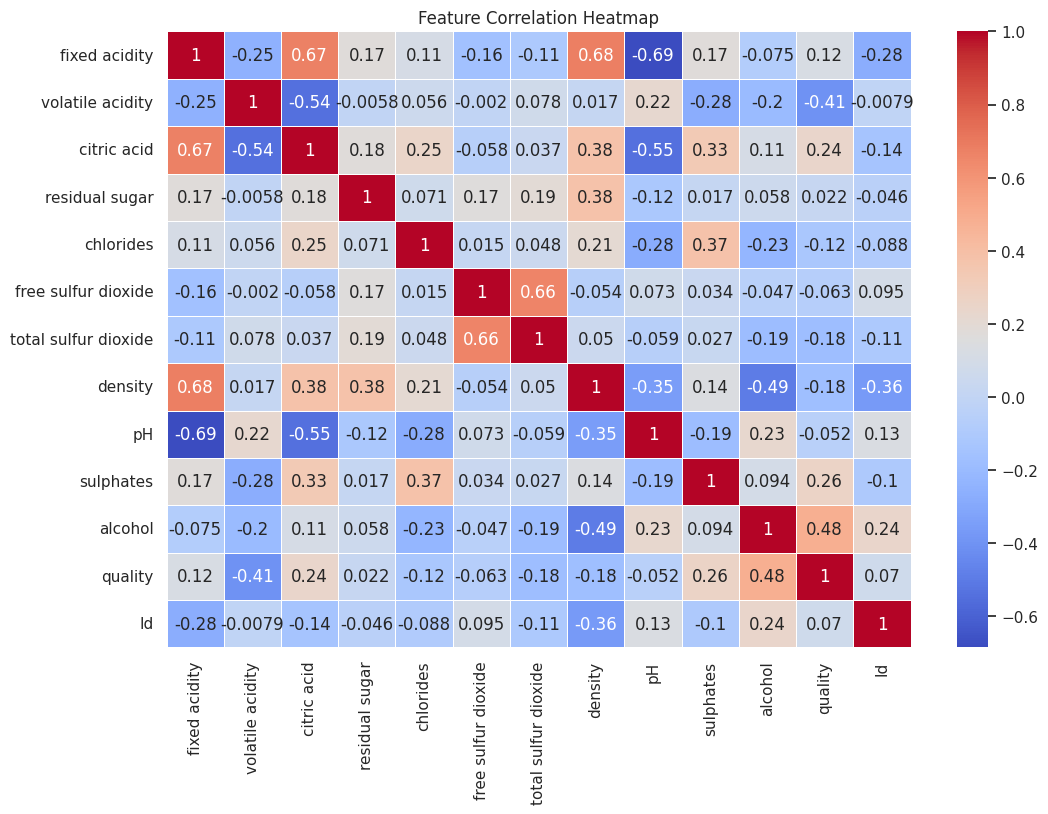

In [5]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

/tmp/ipython-input-1545759649.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='viridis')


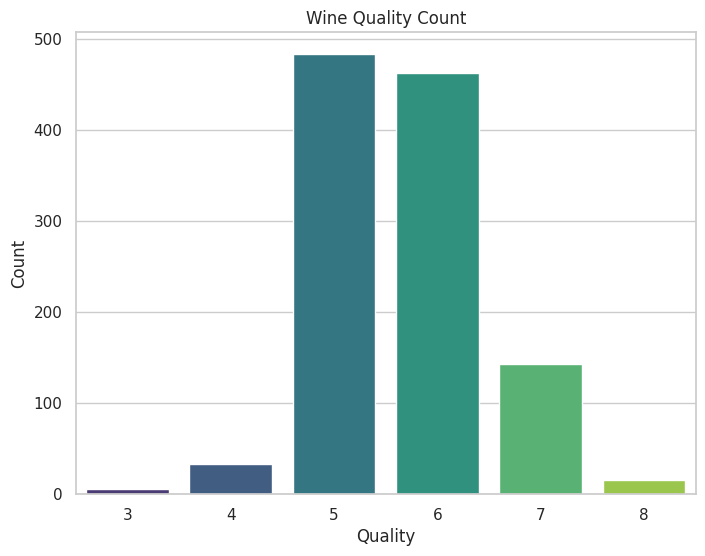

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=df, palette='viridis')
plt.title('Wine Quality Count')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-1082535052.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='alcohol', data=df, palette='cool')


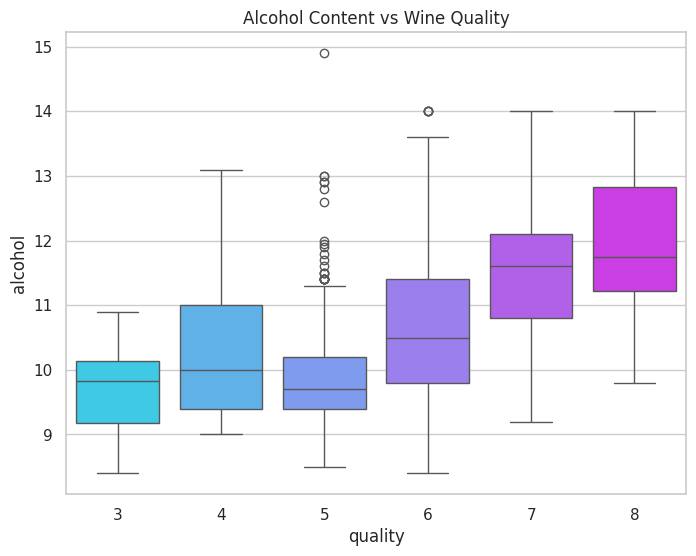

In [7]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='quality', y='alcohol', data=df, palette='cool')
plt.title('Alcohol Content vs Wine Quality')
plt.show()

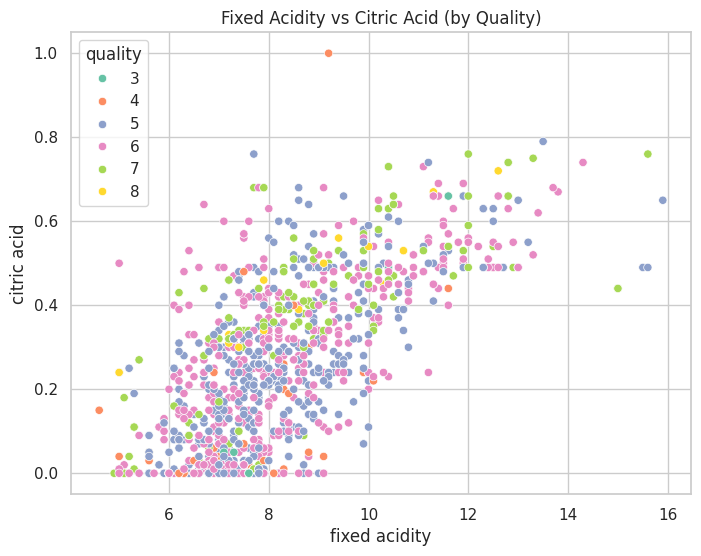

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='fixed acidity', y='citric acid', hue='quality', data=df, palette='Set2')
plt.title('Fixed Acidity vs Citric Acid (by Quality)')
plt.show()

In [9]:
# Target variable
y = df['quality']

# Features (dropping 'quality')
X = df.drop('quality', axis=1)


In [10]:
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [13]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

rf_preds = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))

Random Forest Accuracy: 0.6899563318777293


In [14]:
sgd = SGDClassifier(random_state=42)
sgd.fit(X_train, y_train)

sgd_preds = sgd.predict(X_test)
print("SGD Accuracy:", accuracy_score(y_test, sgd_preds))

SGD Accuracy: 0.5851528384279476


In [15]:
svc = SVC()
svc.fit(X_train, y_train)

svc_preds = svc.predict(X_test)
print("SVC Accuracy:", accuracy_score(y_test, svc_preds))

SVC Accuracy: 0.6550218340611353


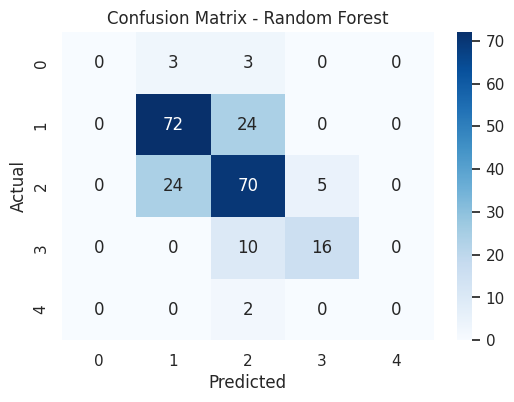

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Random Forest
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

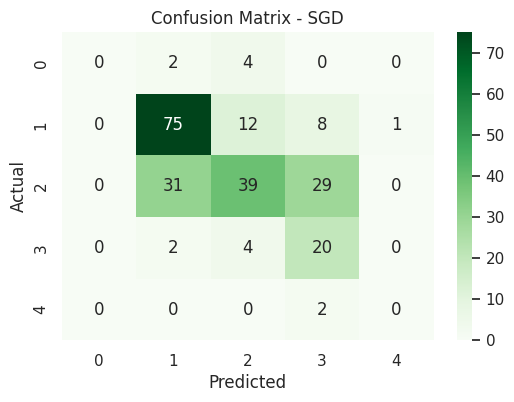

In [17]:
# SGD Classifier
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, sgd_preds), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - SGD")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

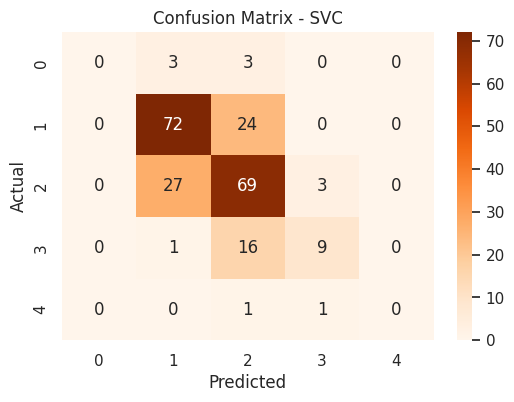

In [18]:
# SVC
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, svc_preds), annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - SVC")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [19]:
print("Random Forest Report:\n", classification_report(y_test, rf_preds))
print("SGD Classifier Report:\n", classification_report(y_test, sgd_preds))
print("SVC Report:\n", classification_report(y_test, svc_preds))

Random Forest Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.73      0.75      0.74        96
           6       0.64      0.71      0.67        99
           7       0.76      0.62      0.68        26
           8       0.00      0.00      0.00         2

    accuracy                           0.69       229
   macro avg       0.43      0.41      0.42       229
weighted avg       0.67      0.69      0.68       229

SGD Classifier Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.68      0.78      0.73        96
           6       0.66      0.39      0.49        99
           7       0.34      0.77      0.47        26
           8       0.00      0.00      0.00         2

    accuracy                           0.59       229
   macro avg       0.34      0.39      0.34       229
weighted avg       0.61      0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

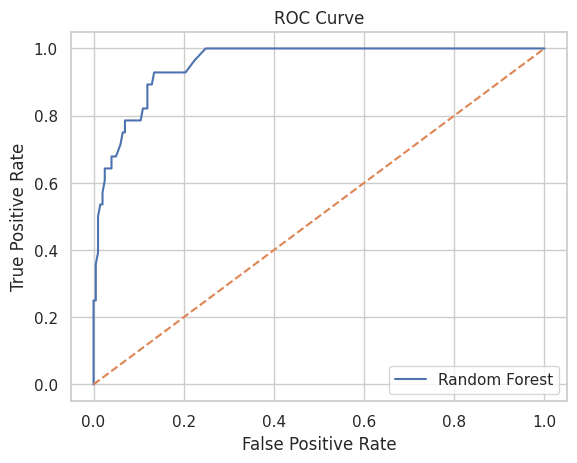

ROC AUC Score: 0.9540689410092396


In [20]:
# Recreate target for binary classification (>=7 = good)
df['good_quality'] = [1 if q >= 7 else 0 for q in df['quality']]

X = df.drop(['quality', 'good_quality'], axis=1)
y = df['good_quality']

# Train-test split again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale again
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Random Forest on binary labels
rf_binary = RandomForestClassifier(random_state=42)
rf_binary.fit(X_train, y_train)
rf_binary_preds = rf_binary.predict_proba(X_test)[:,1]

from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, _ = roc_curve(y_test, rf_binary_preds)
plt.figure()
plt.plot(fpr, tpr, label='Random Forest')
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print("ROC AUC Score:", roc_auc_score(y_test, rf_binary_preds))

In [21]:
!pip install joblib


In [22]:
import joblib

# Save model to file
joblib.dump(rf, 'wine_quality_model.pkl')

['wine_quality_model.pkl']